# Analyzing the factors affecting demand of electric cycles of an Indian Start-up

<font color = 'green'> **_Shailendra Pratap Singh - DSML Dec'22 MWF_**

# Case Details

**About Company**

The company is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Bike zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

The company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

# Problem Statement

<font size = 3 color = 'darkcyan'>

_**The Company has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.**_

# Importing Libraries

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, binom, geom
from scipy.stats import t, ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chi2, chisquare, chi2_contingency
from scipy.stats import f,f_oneway
from scipy.stats import pearsonr,spearmanr

from scipy.stats import kruskal,shapiro,ttest_ind,levene, kstest
from statsmodels.graphics.gofplots import qqplot

# Importing the Dataset

In [2]:
!gdown 10t7R8wlPqCfd7qXM4ASj4injg0YRbQvT

Downloading...
From: https://drive.google.com/uc?id=10t7R8wlPqCfd7qXM4ASj4injg0YRbQvT
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 24.7MB/s]


In [3]:
# Importing the csv file to pandas dataframe
yulu = pd.read_csv("/content/yulu.csv")

In [4]:
# Creating a copy of the original dataset
df = yulu.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Exploration

## Basic Exploration

In [5]:
# Getting the shape of the data
df.shape

(10886, 12)

In [6]:
# Getting the count and datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## <font color = "green"> Observations

    1. Dataset contains 10,886 observations of 12 features for different users.
    2. "season", "holiday", "workingday", and "weather" variables need to be converted to category datatype.

## Conversion of datetime attributes to 'datetime'

In [7]:
# converting datetime column to datetime datatype
df["datetime"] = pd.to_datetime(df["datetime"])

## Conversion of categorical attributes to 'category'

In [8]:
# Conversion of category attributes to 'category'
    # season - to categorical
    # holiday - to categorical
    # workingday - to categorical
    # weather - to categorical

df[["season", "holiday", "workingday", "weather"]] = df[["season", "holiday", "workingday", "weather"]].astype("category")

In [9]:
# datatype of the each column
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
## Extracting column names  for categorical variables
cat_cols = df.dtypes=="category"
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['season', 'holiday', 'workingday', 'weather']

In [11]:
## Extracting column names  for numerical variables
num_cols = (df.dtypes=='int64') | (df.dtypes=='float64')
num_cols = list(num_cols[num_cols].index)
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

## Feature Exploration

In [12]:
## Summary of the numerical variables
df.describe().round(2)

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,41.00,45.46,100.00,57.00,367.00,886.00,977.00


In [13]:
# Summary of categorical variables
df.describe(include= ["category", "object"]).T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


## Exploration using Profiling Tool

In [14]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Profiling Report")
# profile

## <font color = "green"> Observations


    1. The dataset consists of observations of around two years.
    2. There is a significant difference observed between means and medians of at least three features, which suggests the presence of the outliers

## Missing Values and Outliers

### Missing Values Detection

In [15]:
# Percentage of Missing values in the dataset
df.isna().mean()*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

### Outliers

In [16]:
## Function to get the percentage of outliers in the Feature
def perc_outliers(x):
    q1 = np.percentile(df[x],25)
    q2 = np.percentile(df[x],50)
    q3 = np.percentile(df[x],75)
    q4 = np.percentile(df[x],100)
    iqr = q3-q1
    upper_threshold = min((q3+ 1.5*iqr), q4)
    lower_threshold = max(q1 - 1.5*iqr, 0)
    outliers = df.loc[(df[x] > upper_threshold) | (df[x] < lower_threshold)][x].count()
    print("Percentage of Oultiers in the", c ,  "column - ", np.round(outliers*100/df.shape[0], 2), "%")

Percentage of Oultiers in the temp column -  0.0 %
Percentage of Oultiers in the atemp column -  0.0 %
Percentage of Oultiers in the humidity column -  0.2 %
Percentage of Oultiers in the windspeed column -  2.09 %
Percentage of Oultiers in the casual column -  6.88 %
Percentage of Oultiers in the registered column -  3.89 %
Percentage of Oultiers in the count column -  2.76 %


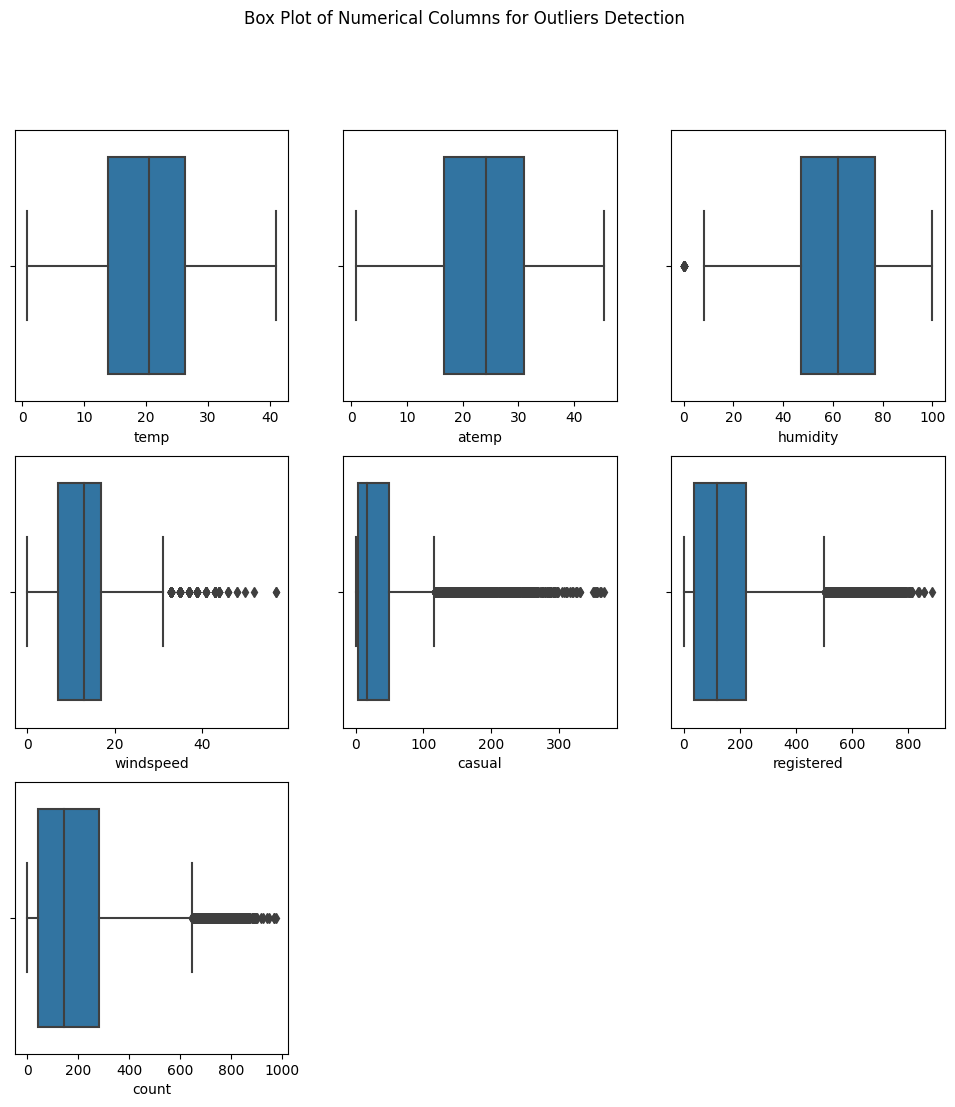

In [17]:
## Detection of Outliers
plt.figure(figsize=(12,12))
i=0
for c in num_cols:
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data=df, x = c);
    perc_outliers(c)
    i += 1
plt.suptitle("Box Plot of Numerical Columns for Outliers Detection");

## <font color = "green"> Observations


    1. There is no missing value in the dataset
    2. There is a presence of outliers in the 'count', 'registered','casual', 'windspeed', 'humidity' columns

# Exploratory Data Analysis

## Non-Graphical Analysis

In [18]:
## Extracting Date, Year, Month, Day from Datetime
df["date"] = df['datetime'].dt.date
df["year"] = df['datetime'].dt.year
df["month"] = df['datetime'].dt.month
df["day"] = df['datetime'].dt.day

In [19]:
## Unique values in the categorical columns
uni_cnt = pd.DataFrame(columns= ['Variables', 'Unique Values'])
for i in df.columns:
    uni_cnt.loc[len(uni_cnt.index)] = [i, df[i].nunique()]
uni_cnt

,Variables,Unique Values
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


In [20]:
## Getting the value counts and Proportions for categorical columns
for i in cat_cols:
    print("Value counts and Proportions of "+i, "\n")
    print(pd.DataFrame({
        "Count": df[i].value_counts(),
        "Proportion": df[i].value_counts(normalize=True).round(2)
    }))
    print("*"*50)

Value counts and Proportions of season 

   Count  Proportion
4   2734        0.25
2   2733        0.25
3   2733        0.25
1   2686        0.25
**************************************************
Value counts and Proportions of holiday 

   Count  Proportion
0  10575        0.97
1    311        0.03
**************************************************
Value counts and Proportions of workingday 

   Count  Proportion
1   7412        0.68
0   3474        0.32
**************************************************
Value counts and Proportions of weather 

   Count  Proportion
1   7192        0.66
2   2834        0.26
3    859        0.08
4      1        0.00
**************************************************


## <font color = "green"> Observations

    1. There are 10,886 observations, of 456 date, of two years
    2. Weather category 1 (Clear, Few clouds, partly cloudy, partly cloudy) is the most common weather

## Graphical Analysis

### Univariate Analysis

In [21]:
## Numerical columns
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [22]:
# Defining a function to plot the distribution of list of variables
def plot_dist(var_list, df):
  nvar = len(var_list)
  ind = 1 ## for subplot indexing
  plt.figure(figsize = (20 , 4*nvar))
  nrows = nvar//2 + 1
  ncols = 2

  for v in var_list:
    plt.subplot(nrows, ncols, ind)
    sns.histplot(data=df, x = v, kde = True, bins = 20, color= 'darkcyan' )
    plt.title('Distribution of '+ v)
    ind += 1

In [23]:
## Defining function for Normality Test
def ks_norm_test(arr):
  zscores = (arr - np.mean(arr))/np.std(arr)
  pvalue = kstest(zscores, norm.cdf)[1]
  if pvalue > 0.05:
    return "Distribution is normal: p_value =", pvalue
  else:
    return "Distribution isn't normal: p_value =", pvalue

**Distribution of 'casual', 'registered', and 'count'**

In [24]:
## Aggregating on the basis of date
df_daily = df.groupby(["date"])[["count", 'casual', 'registered']].sum()
df_daily.head()

,count,casual,registered
date,,,
2011-01-01,985,331,654
2011-01-02,801,131,670
2011-01-03,1349,120,1229
2011-01-04,1562,108,1454
2011-01-05,1600,82,1518


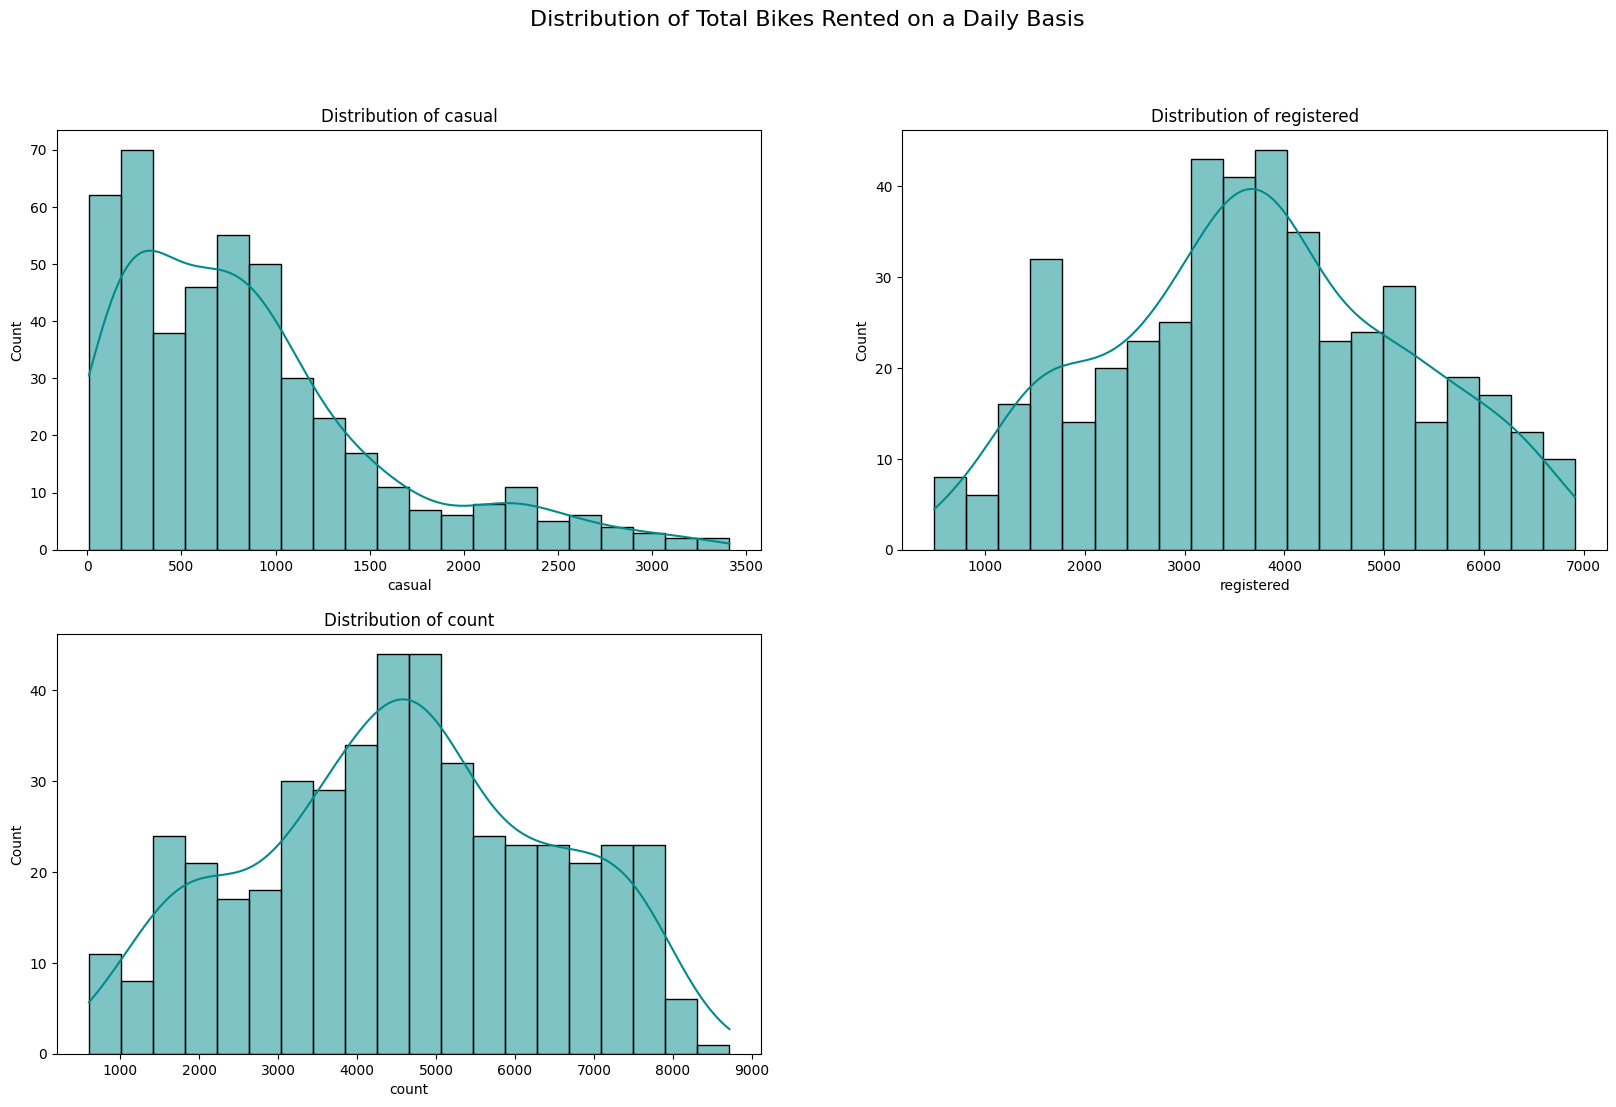

In [25]:
# Plotting the distribution of total bikes rented on a daily basis
rented = ['casual', 'registered', 'count']
plot_dist(rented, df_daily)
plt.suptitle("Distribution of Total Bikes Rented on a Daily Basis", fontsize = 16);

In [26]:
## Checking for normality of the distribution
daily_count = df_daily['count']
daily_casual = df_daily['casual']
daily_registered = df_daily['registered']

print("count\n", ks_norm_test(daily_count))
print("casual\n", ks_norm_test(daily_casual))
print("registered\n", ks_norm_test(daily_registered))

count
 ('Distribution is normal: p_value =', 0.3492145156969696)
casual
 ("Distribution isn't normal: p_value =", 4.784563492011375e-06)
registered
 ('Distribution is normal: p_value =', 0.3925519165463769)


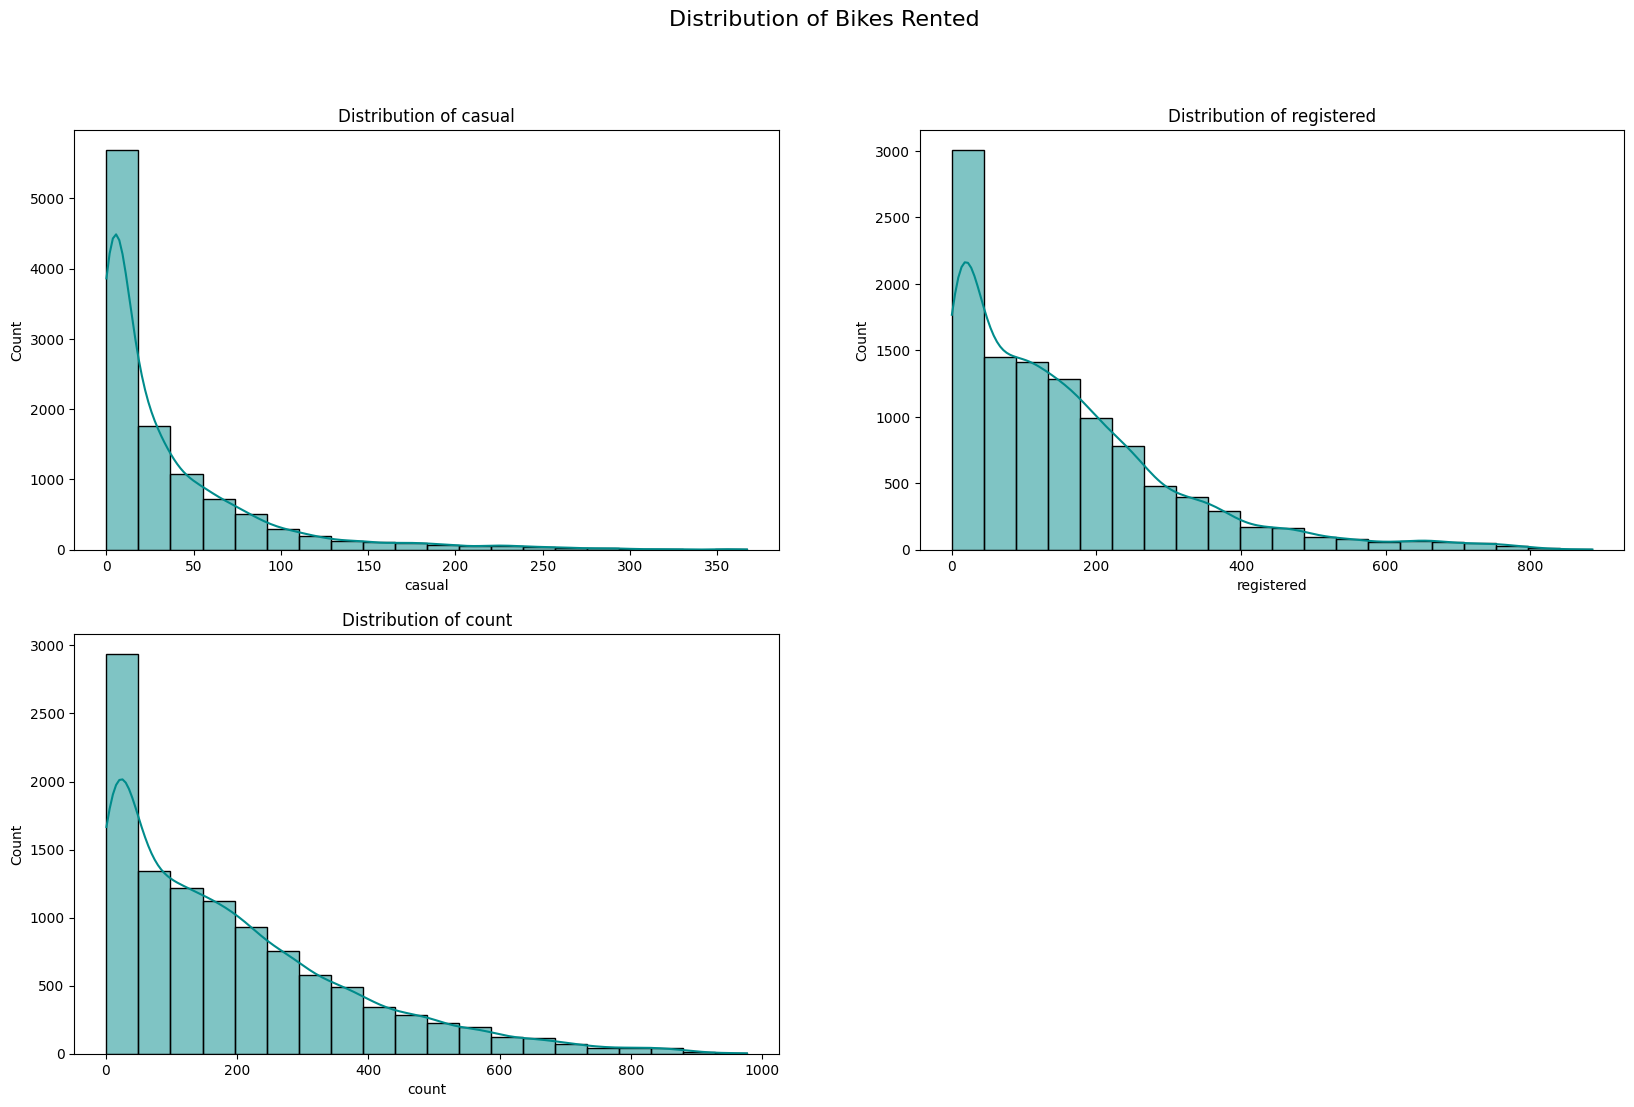

In [27]:
# Plotting the distribution of bikes rented
rented = ['casual', 'registered', 'count']
plot_dist(rented, df)
plt.suptitle("Distribution of Bikes Rented", fontsize = 16);

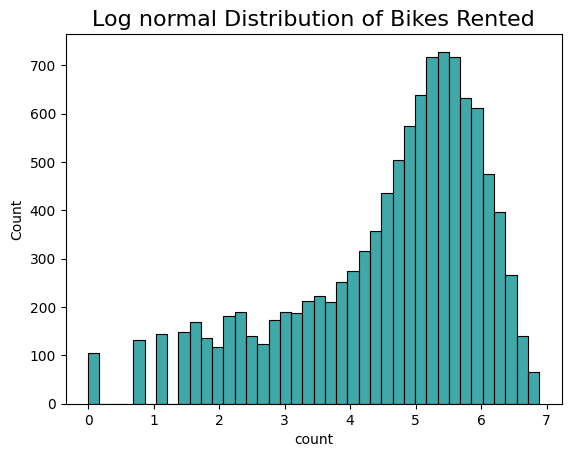

In [28]:
## Checking if the distribution of totel bike rented is log normal
log_count = np.log(df['count'])
log_count
sns.histplot(log_count, color = "darkcyan")
plt.title("Log normal Distribution of Bikes Rented", fontsize = 16);

In [29]:
## Checking for normality of log distribution
ks_norm_test(log_count!=0)

("Distribution isn't normal: p_value =", 0.0)

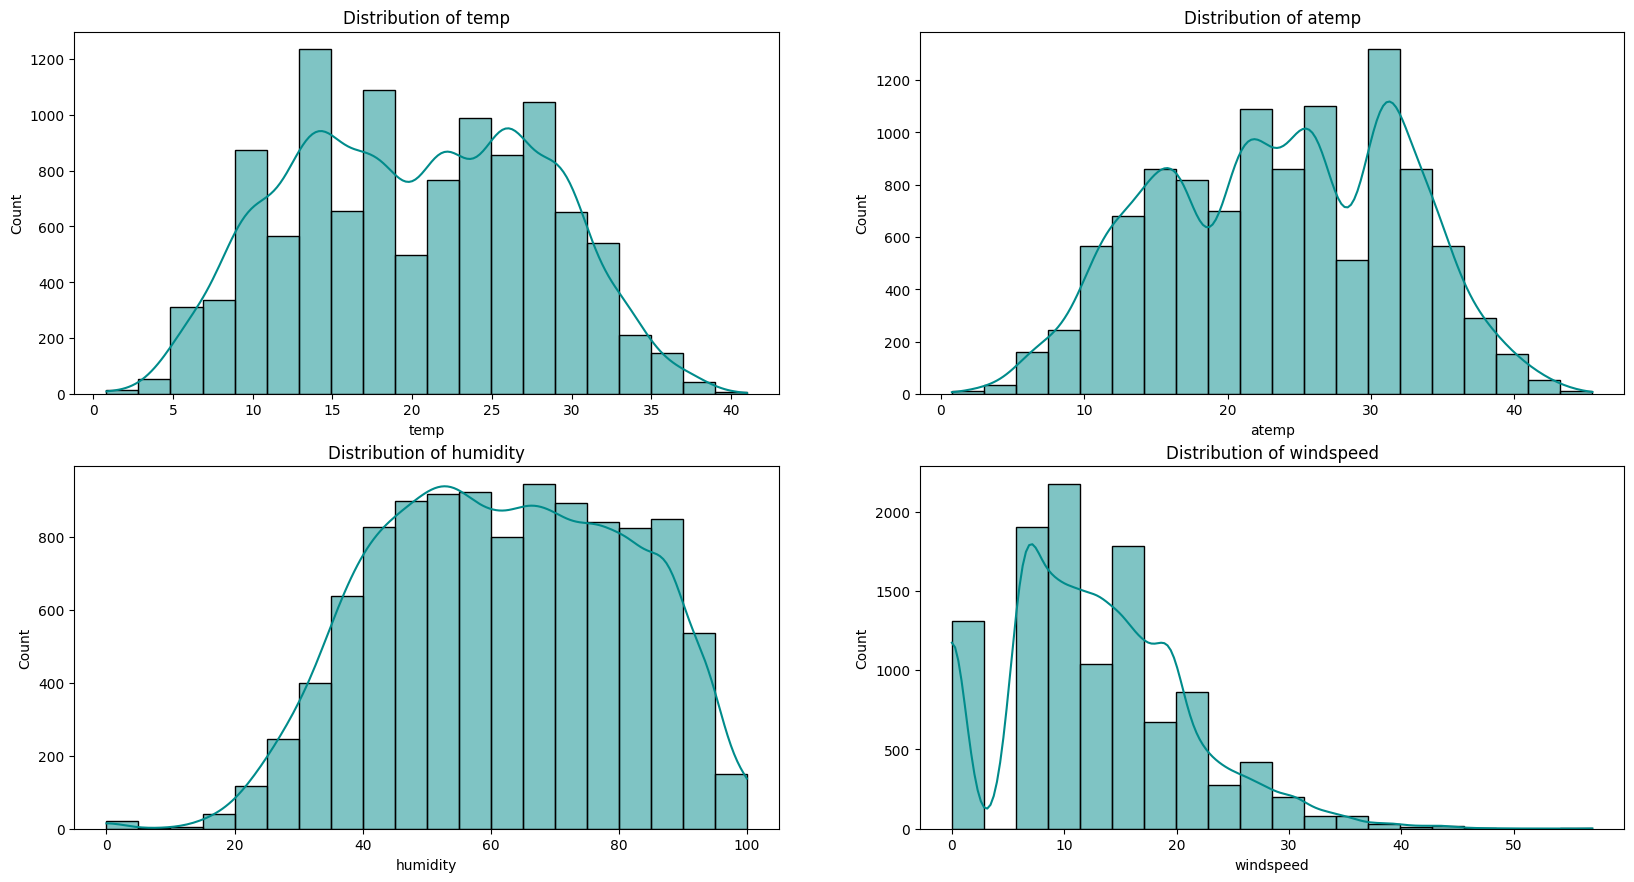

In [30]:
var_list =  ['temp', 'atemp', 'humidity', 'windspeed']
plot_dist(var_list, df)

**Time-Series Plot**

<Figure size 1000x600 with 0 Axes>

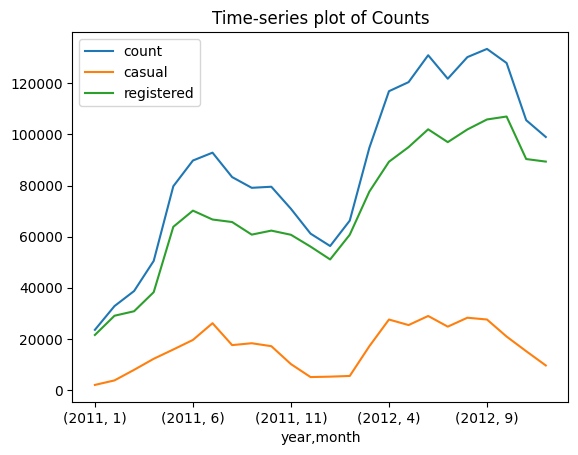

In [31]:
plt.figure(figsize = (10,6))
ax = df.groupby(["year", "month"])[["count",'casual', 'registered']].sum().plot();
plt.title("Time-series plot of Counts");

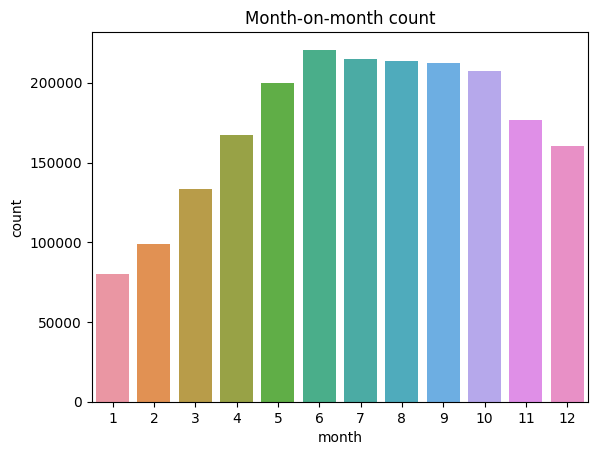

In [32]:
# Month on Month total count of bikes rented
mom = df.groupby(["month"])["count"].sum().reset_index()
sns.barplot(y = mom["count"], x = mom["month"])
plt.title("Month-on-month count")
plt.show()

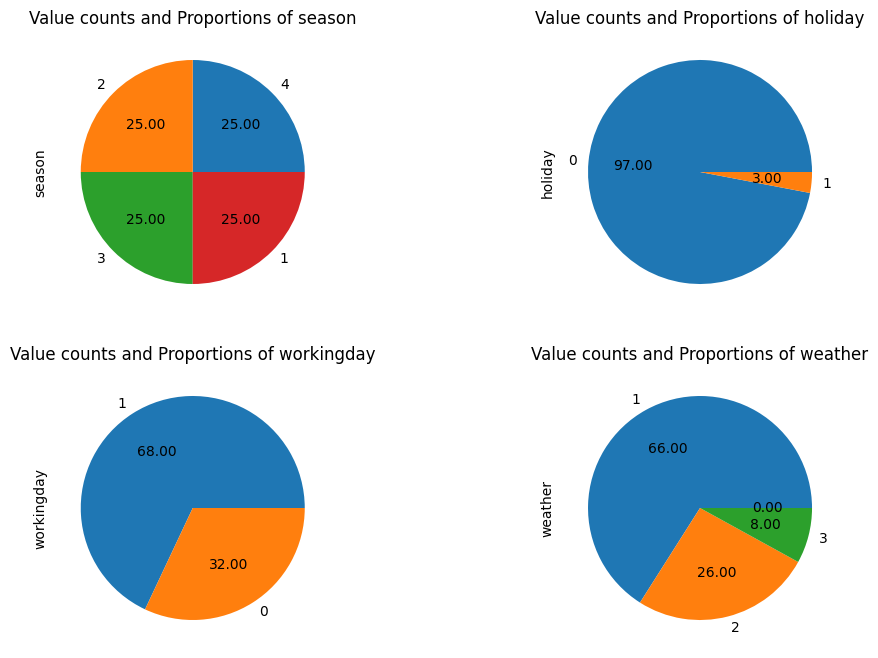

In [33]:
x=1
plt.figure(figsize=(12,8))
for i in cat_cols:
    plt.subplot(2,2,x)
    df[i].value_counts(normalize=True).round(2).plot(kind='pie', autopct ="%.2f")
    plt.title("Value counts and Proportions of "+i)
    x +=1

## <font color = green> Observation


1.   The distribution of total bike rented on a daily basis is normally distributed
2.   The distribution of count of bike rented is neither normally distributed nor log normally distributed.
3.   There is a seasonality present in the dataset
4.   We have datapoints evenly distributed for all the seasons
5.   3% of the data is of holiday, and 32% of the datapoints are of non-working day
6.   We do not have sufficient datapoints for weather 4.






### Bivariate Analysis

In [34]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1


In [35]:
# Defining a function to plot the distribution of list of variables
def box_var(var_list, df):
  nvar = len(var_list)
  ind = 1 ## for subplot indexing
  plt.figure(figsize = (20 , 4*nvar))
  nrows = nvar//2 + 1
  ncols = 2

  for v in var_list:
    plt.subplot(nrows, ncols, ind)
    sns.boxplot(data=df, x = v, y = "count" )
    plt.title('Distribution of '+ v)
    ind += 1

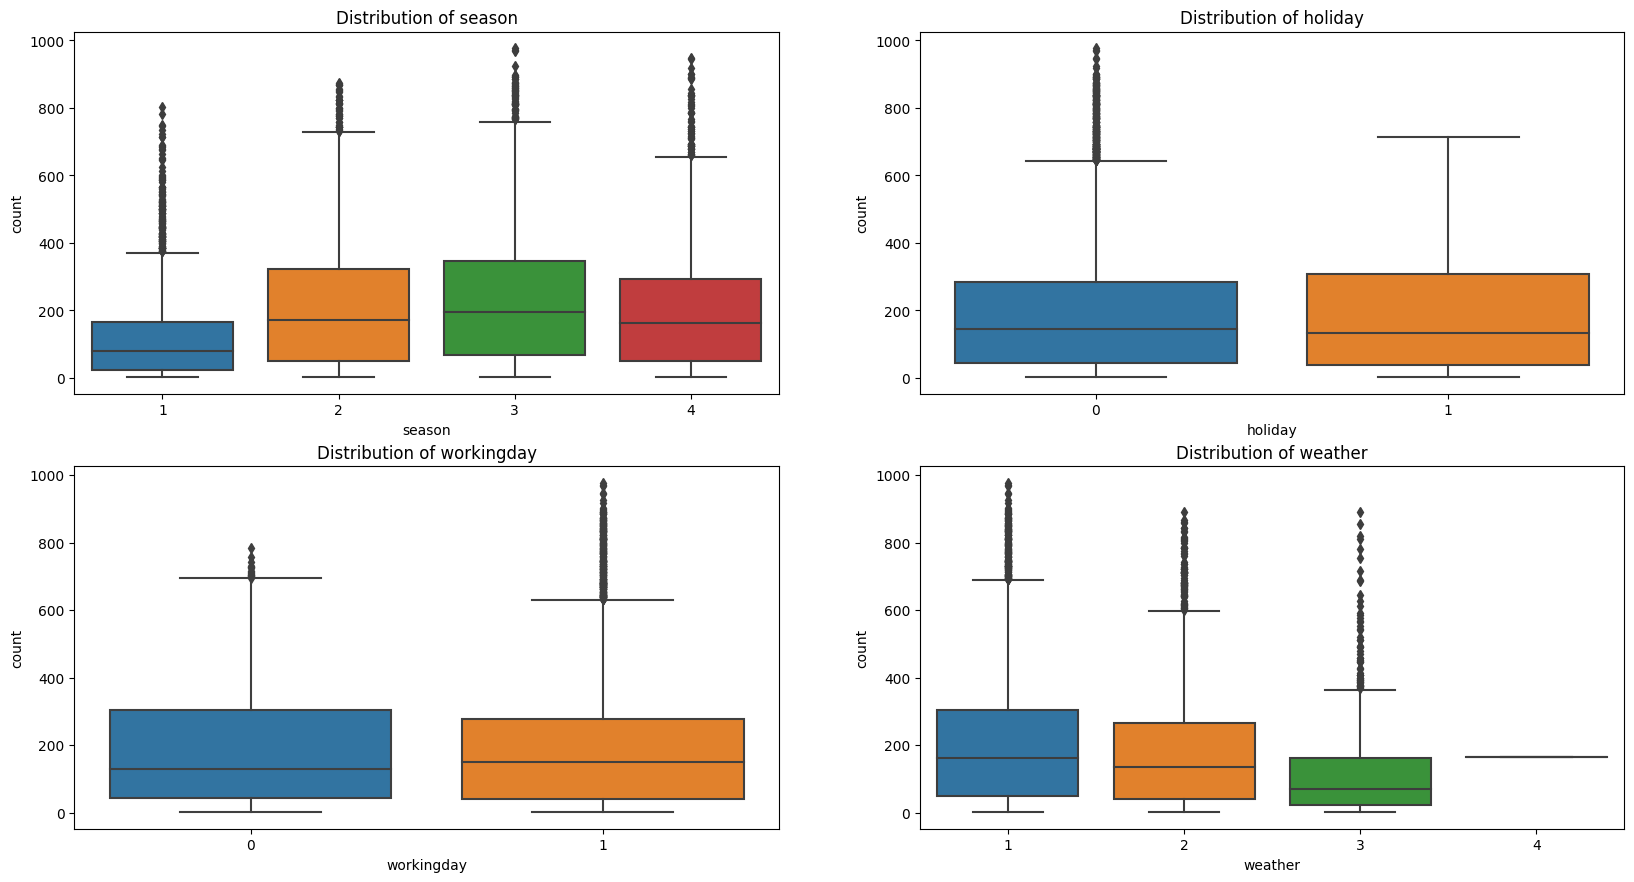

In [36]:
cat_cols
box_var(cat_cols, df)

In [37]:
var_list

['temp', 'atemp', 'humidity', 'windspeed']

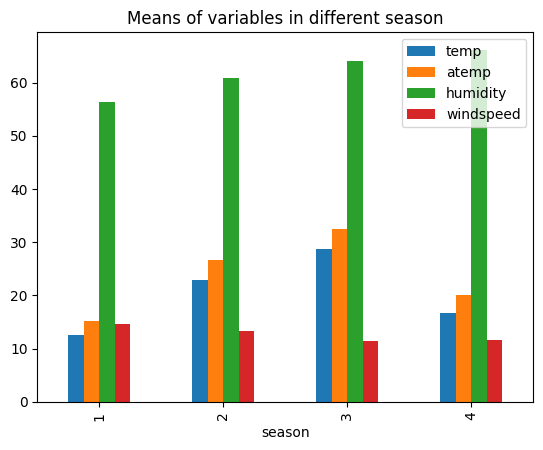

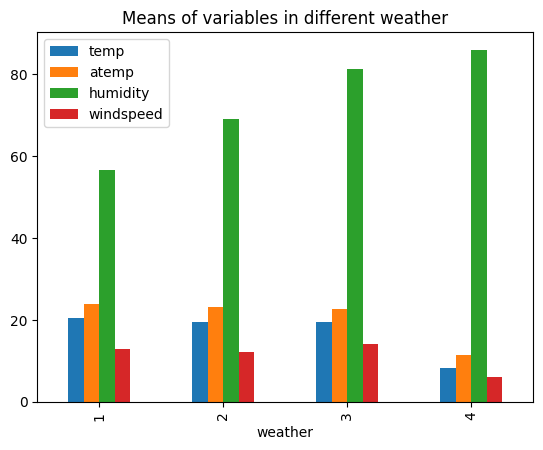

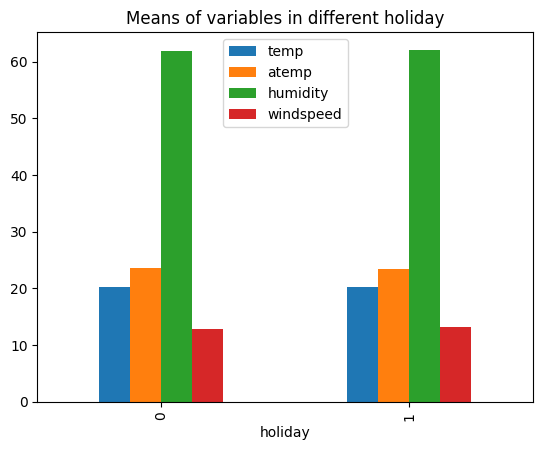

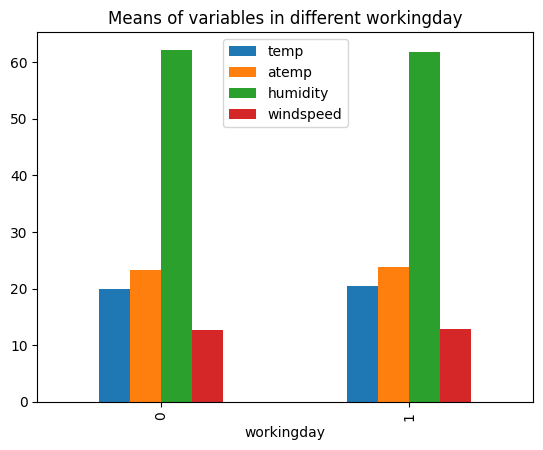

In [38]:
df.groupby('season')[var_list].mean().plot(kind="bar", title = "Means of variables in different season");
df.groupby('weather')[var_list].mean().plot(kind="bar",title = "Means of variables in different weather");
df.groupby('holiday')[var_list].mean().plot(kind="bar",title = "Means of variables in different holiday");
df.groupby('workingday')[var_list].mean().plot(kind="bar",title = "Means of variables in different workingday");

## <font color = green> Observation


1. Summer and Fall season has higher median counts of bikes rented
2. Weather 1 (Clear, Few clouds, partly cloudy) has higher median counts of bikes rented
3. Workingday has higher median count of bikes rented than non-working day

### Multivariate Analysis

In [39]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day'],
      dtype='object')

In [40]:
corel = df[num_cols].corr().round(2)
corel.style.background_gradient(cmap='coolwarm')

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.980000,-0.060000,-0.020000,0.470000,0.320000,0.390000
atemp,0.980000,1.000000,-0.040000,-0.060000,0.460000,0.310000,0.390000
humidity,-0.060000,-0.040000,1.000000,-0.320000,-0.350000,-0.270000,-0.320000
windspeed,-0.020000,-0.060000,-0.320000,1.000000,0.090000,0.090000,0.100000
casual,0.470000,0.460000,-0.350000,0.090000,1.000000,0.500000,0.690000
registered,0.320000,0.310000,-0.270000,0.090000,0.500000,1.000000,0.970000
count,0.390000,0.390000,-0.320000,0.100000,0.690000,0.970000,1.000000


<Axes: >

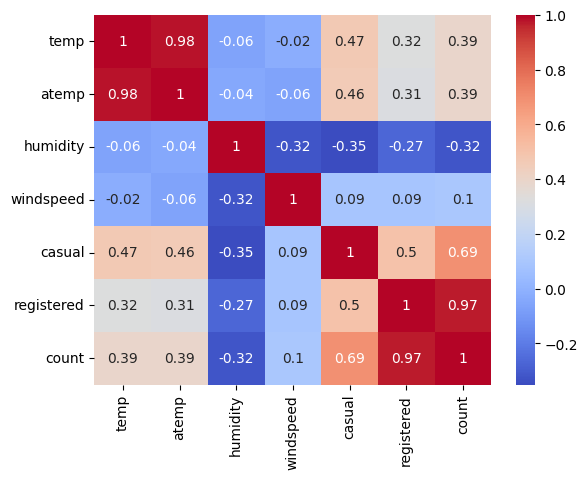

In [41]:
sns.heatmap(corel, annot=True, cmap='coolwarm')

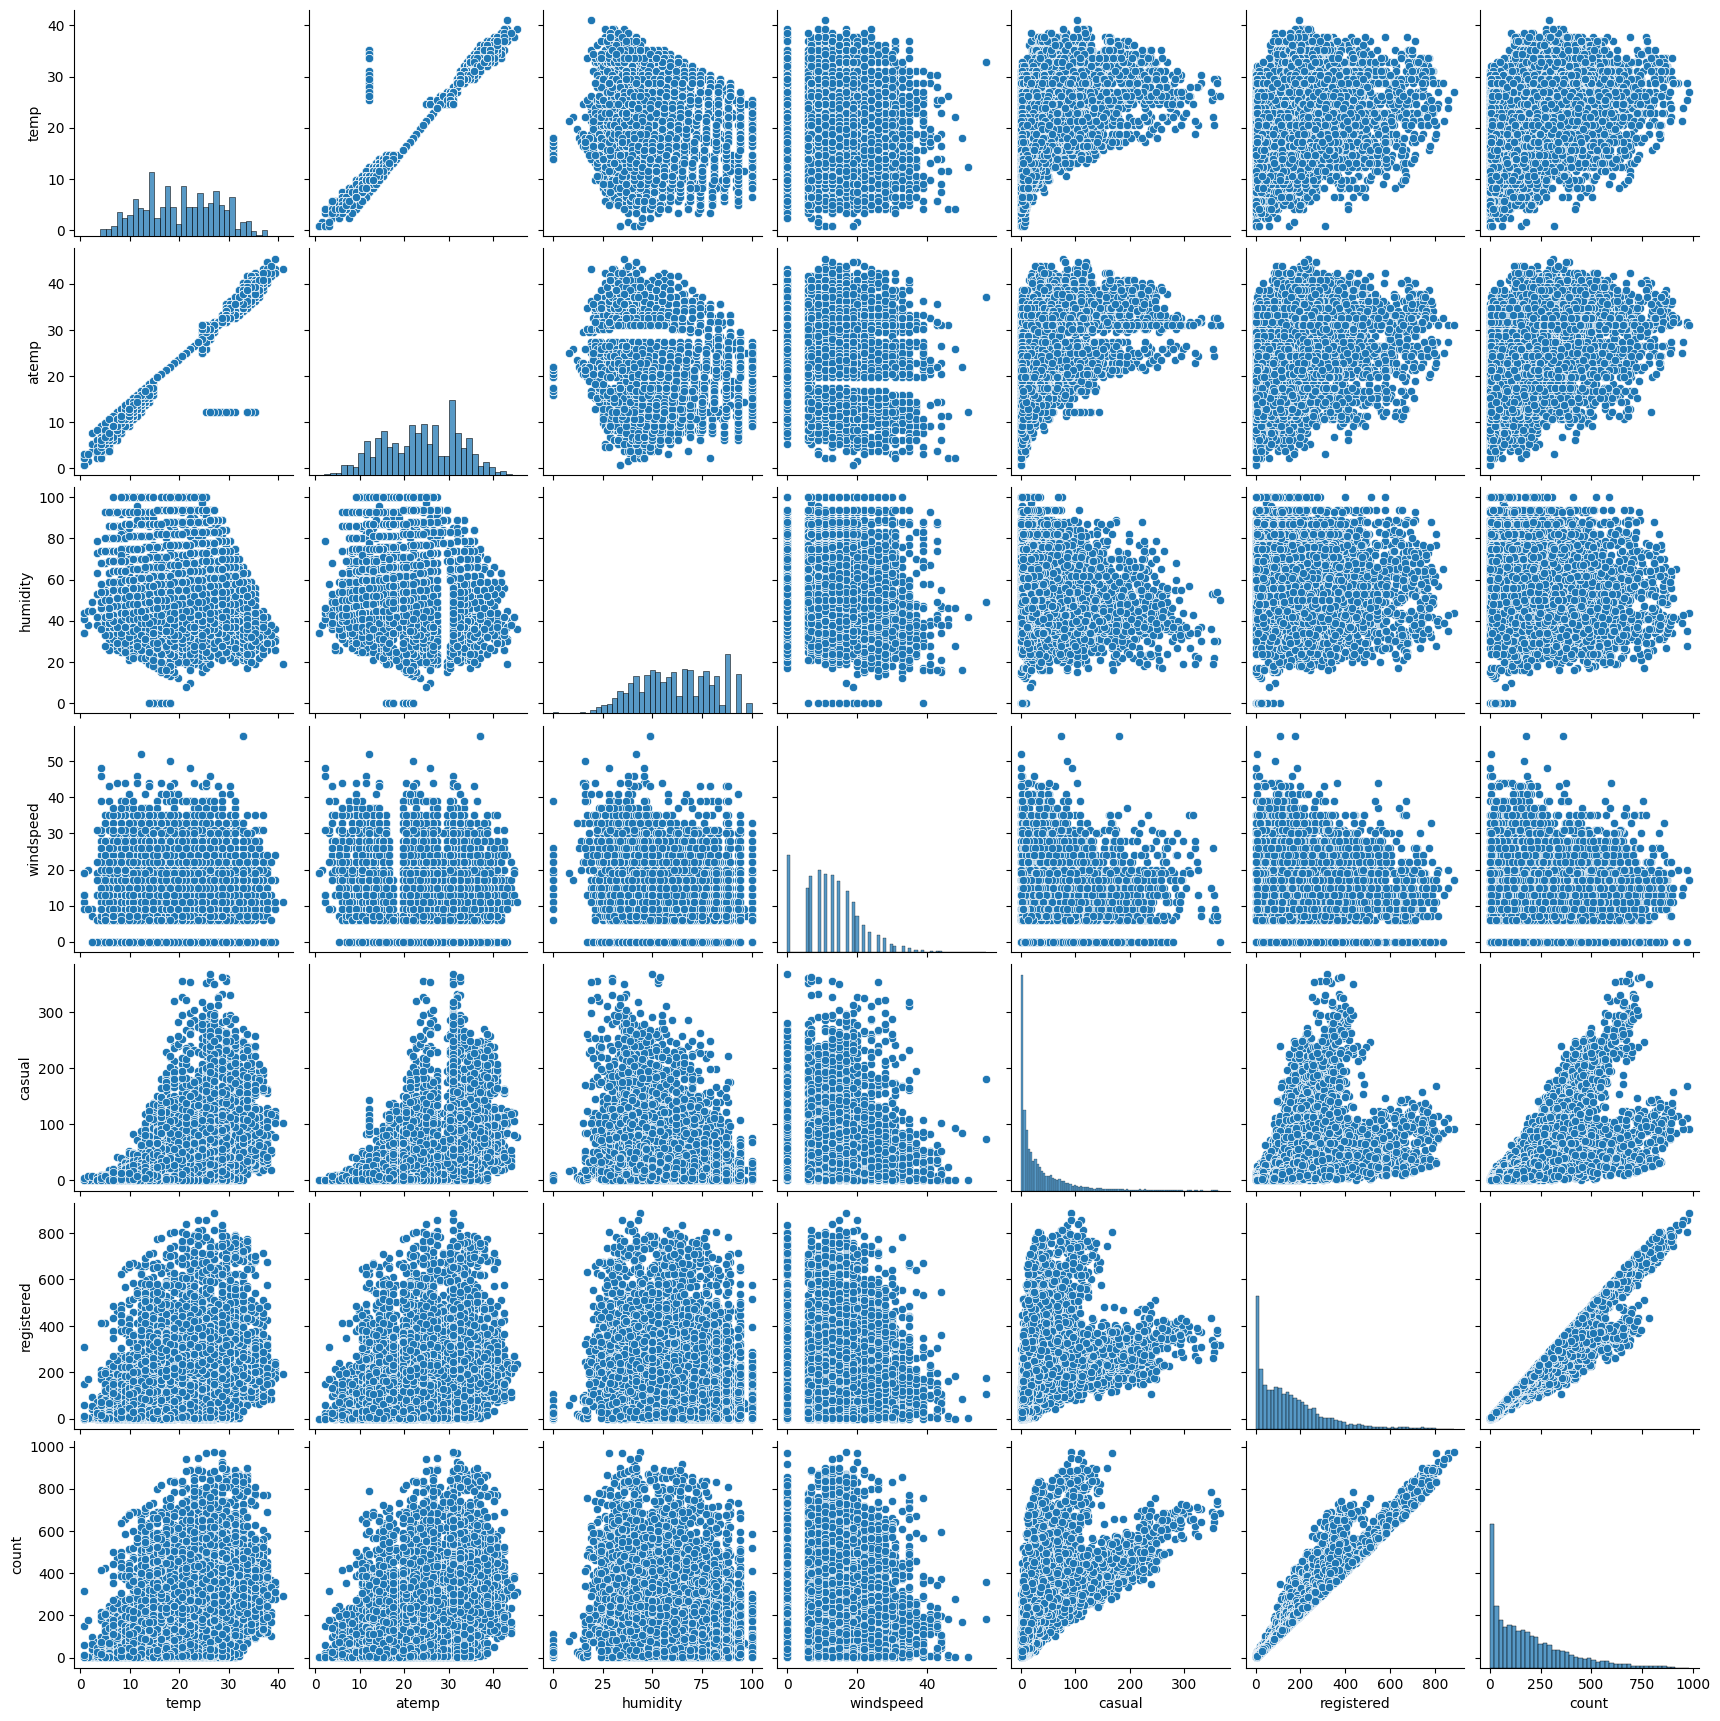

In [42]:
sns.pairplot(df[num_cols]);

<Axes: xlabel='season', ylabel='count'>

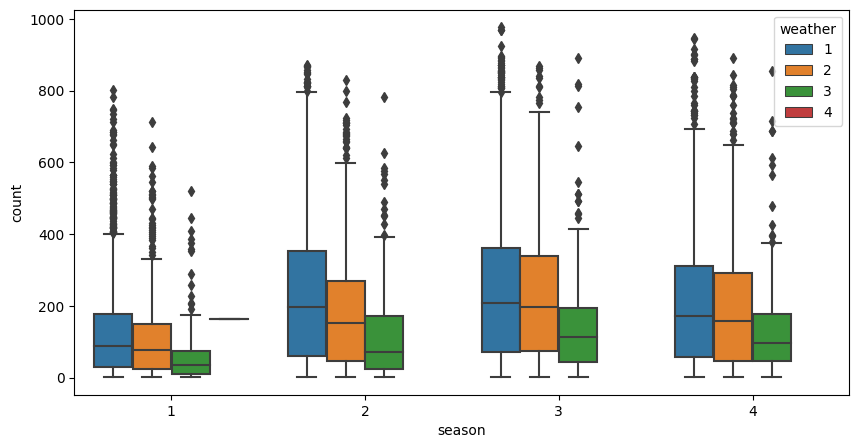

In [43]:
plt.figure(figsize= (10,5))
sns.boxplot(x=df['season'], y=df['count'], hue= df['weather'])

<Axes: xlabel='workingday', ylabel='count'>

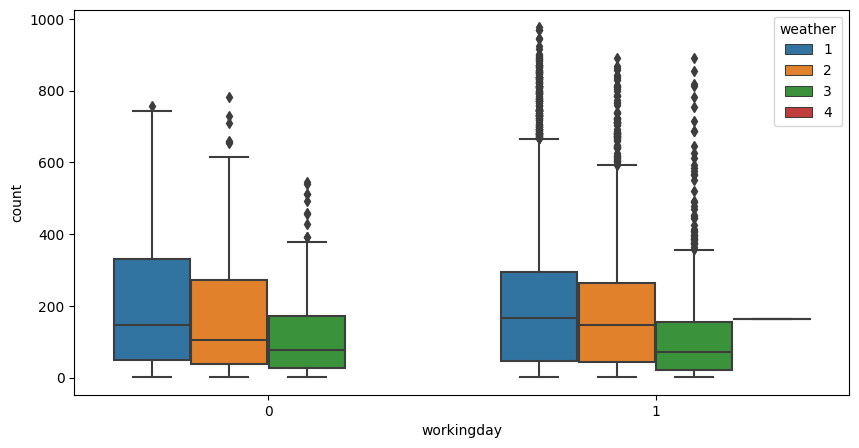

In [44]:
plt.figure(figsize= (10,5))
sns.boxplot(x=df['workingday'], y=df['count'], hue= df['weather'])

<Axes: xlabel='workingday', ylabel='count'>

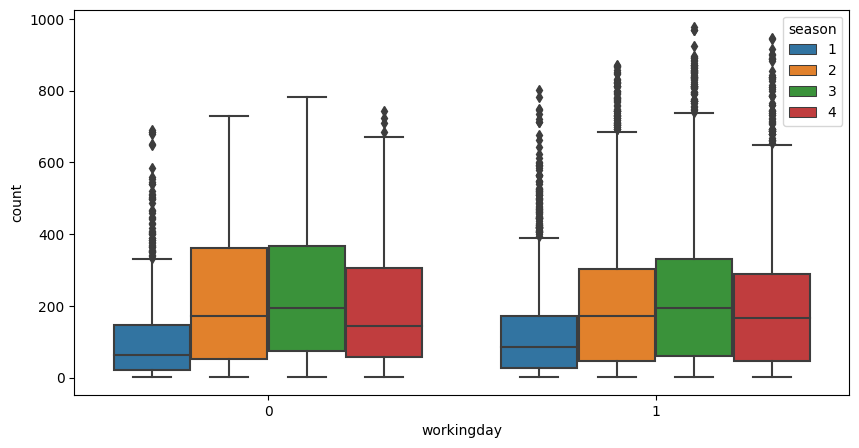

In [45]:
plt.figure(figsize= (10,5))
sns.boxplot(x=df['workingday'], y=df['count'], hue= df['season'])

## <font color = green> Observation


1. temp and atemp are highly correlated
2. count and registered are highly correlated
3. There isn't significant correlation among Temp, humidity, and windspeed and count, but it is observed that:
  - Demand is higher for temp (or atemp) 20-30 degrees
  - Demand is higher for humidity between 20% - 80%
4. Demand is higher for Clear weather for both working and non-working days

# Hypothesis Testing

**Questions**<br>
- 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
- ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
- Chi-square test to check if Weather is dependent on the season (10 points)

**Solution Approach**<br>
- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
    - Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis

### Q1. Whether Working Day has effect on number of electric cycles rented?
**2- Sample T-Test**

In [46]:
## Frequencies of the working and non working days in the dataset
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

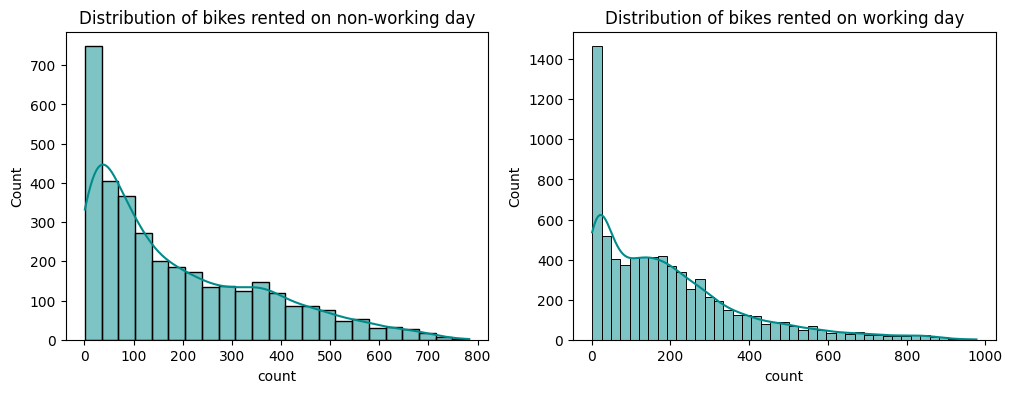

In [47]:
## Getting the array and mean of 'count' columns for working and non-working day
wd_0 = df.loc[df["workingday"]==0, "count"]
wd_1 = df.loc[df["workingday"]==1, "count"]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(wd_0, kde = True, color = 'darkcyan')
plt.title('Distribution of bikes rented on non-working day');
plt.subplot(1,2,2)
sns.histplot(wd_1, kde = True, color = 'darkcyan')
plt.title('Distribution of bikes rented on working day')
plt.show()

**The distribution is not normal**

In [48]:
# Aggregating the data based on date
w0 = df.loc[df["workingday"]==0, ['date', 'count']]
w0_daily = w0.groupby('date')["count"].sum()

w1 = df.loc[df["workingday"] == 1, ['date', 'count']]
w1_daily = w1.groupby('date')["count"].sum()

print('Average of count of daily rental bikes on non-working day -', w1_daily.mean())
print('Average of count of daily rental bikes on working day -', w0_daily.mean())

Average of count of daily rental bikes on non-working day - 4600.012861736334
Average of count of daily rental bikes on working day - 4516.358620689655


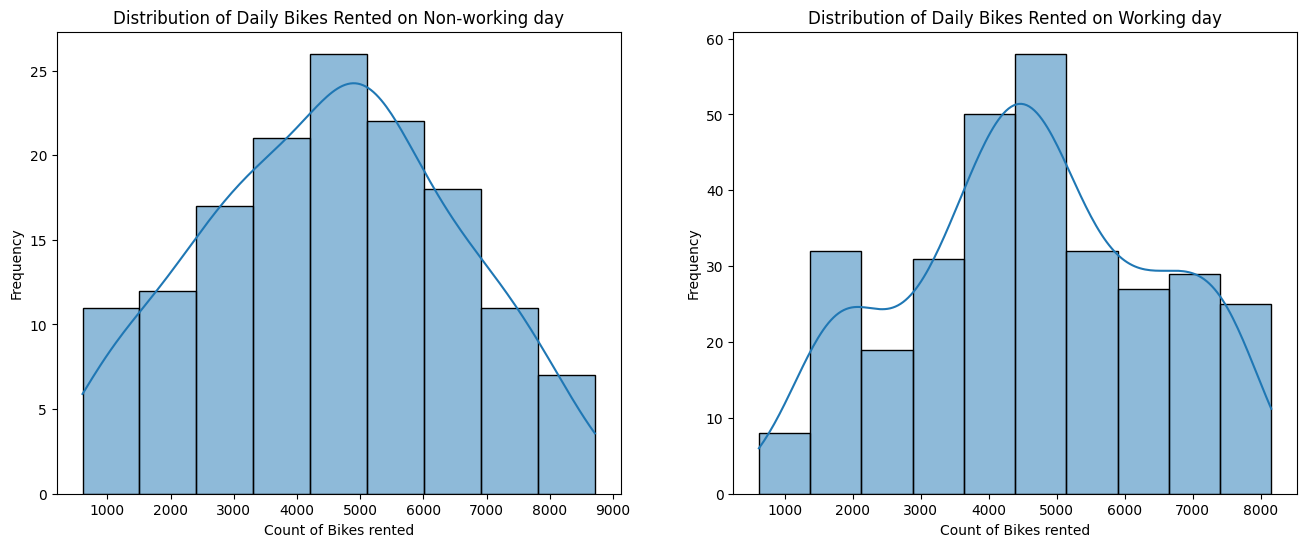

In [49]:
# Plotting the distribution
plt.figure(figsize= (16,6) )
plt.subplot(1,2,1)
sns.histplot(w0_daily, kde=True)
plt.title("Distribution of Daily Bikes Rented on Non-working day", fontsize=12)
plt.xlabel("Count of Bikes rented")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.histplot(w1_daily, kde=True)
plt.title("Distribution of Daily Bikes Rented on Working day", fontsize=12)
plt.xlabel("Count of Bikes rented")
plt.ylabel("Frequency")
plt.show()

Q-Q Plot for daily bikes rented of Working and non-working day


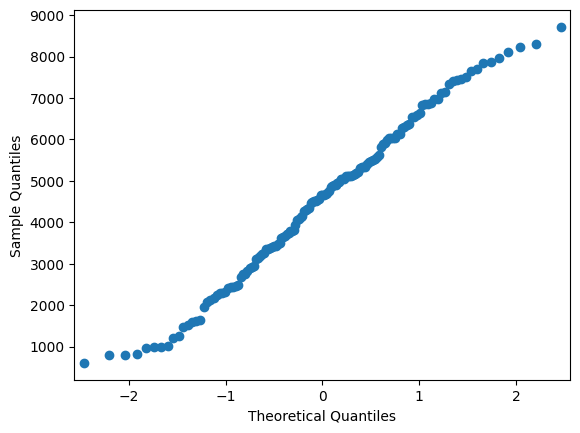

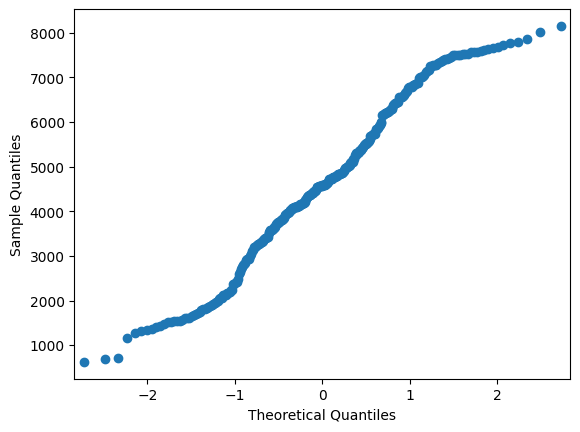

In [50]:
print("Q-Q Plot for daily bikes rented of Working and non-working day")
qqplot(w0_daily)
plt.show()
qqplot(w1_daily)
plt.show()

In [51]:
## Normality Test
print("Bike Rented on non-working day\n", ks_norm_test(w0_daily))
print("Bike Rented on working day\n", ks_norm_test(w1_daily))

Bike Rented on non-working day
 ('Distribution is normal: p_value =', 0.93624240685978)
Bike Rented on working day
 ('Distribution is normal: p_value =', 0.3264202500505822)


In [52]:
## Shapiro's test for normality

## H0: Samples have normal distribution
## Ha: Samples do not have normal distributions

p0 = shapiro(w0_daily)[1]
print('pvalue for non-workingday:', p0)
p1 = shapiro(w1_daily)[1]
print('pvalue for workingday:', p1)

## Assumption sig is 0.05
alpha = 0.05
if p0 < alpha or p1 < alpha:
    print("Both the distributions are not normal")
else:
    print("Both the distribution are normal")

pvalue for non-workingday: 0.0804058164358139
pvalue for workingday: 2.0652621969929896e-05
Both the distributions are not normal


In [53]:
## Levene's test for equal variance

## H0: Samples have equal variances
## Ha: Samples do not have equal variances

pvalue = levene(w0_daily, w1_daily)[1]
print('pvalue :', pvalue)
if pvalue < 0.05:
    print("Samples do not have equal variances")
else:
    print("Samples have equal variances")

pvalue : 0.28003858261286085
Samples have equal variances


In [54]:
## t-test assemptions are not completely followed here, still attempting to perform the test

In [55]:
# 2-sample t-test (independent samples t-test)

# H0: Mean count of the bikes rented are same for working and non-working day
# Ha: Mean count of the bikes rented on workingday is greater than that of non-working day

# Right-tailed test
# test-statistics - t-value

confidence = 0.95
alpha = 0.05

t_stat, pvalue = ttest_ind(w0_daily, w1_daily, equal_var=True,alternative="greater")
print('t_stat: ', t_stat)
print('pvalue: ', pvalue)
if pvalue < alpha:
    print("\nInterpretation: Reject H0-\nWith 95% Counfidence, we can conclude that Mean count of the bikes rented on non-workingday is greater than that of working day")
else:
    print("\nInterpretation: Fail to reject H0\nWith 95% Confidence, We can not conclude that Mean count of the bikes rented on non-workingday is greater than that of working day" )

t_stat:  -0.44477221614881995
pvalue:  0.6716518320060705

Interpretation: Fail to reject H0
With 95% Confidence, We can not conclude that Mean count of the bikes rented on non-workingday is greater than that of working day


In [56]:
dof = len(wd_0) + len(wd_1) - 2
critical_region = t.ppf(1 - alpha / 2, dof)
print(critical_region)
if abs(t_stat) > critical_region:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

1.9601819678713073
Fail to reject the null hypothesis


**Confirmation through bootstrapping**

<Axes: ylabel='Count'>

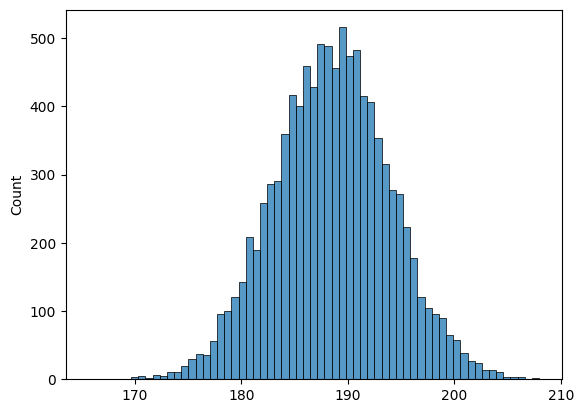

In [57]:
bs_wd0_mean = []
for i in range(10000):
    x = np.random.choice(np.array(wd_0), size=1000)
    bs_wd0_mean.append(np.mean(x))
sns.histplot(bs_wd0_mean)

In [58]:
ci_wd_0=np.percentile(bs_wd0_mean, [2.5, 97.5])
print(ci_wd_0)

[177.926975 199.30005 ]


<Axes: ylabel='Count'>

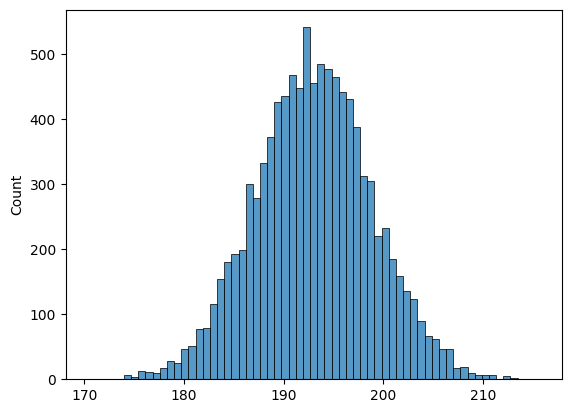

In [59]:
bs_wd1_mean = []
for i in range(10000):
    x = np.random.choice(np.array(wd_1), size=1000)
    bs_wd1_mean.append(np.mean(x))
sns.histplot(bs_wd1_mean)

In [60]:
ci_wd_1=np.percentile(bs_wd1_mean, [2.5, 97.5])
print(ci_wd_1)

[181.54095 204.62835]


In [61]:
pvalue = ttest_ind(bs_wd1_mean,bs_wd0_mean, alternative='greater')[1]
pvalue

0.0

**Overlapping Confidence Interval suggest we can't conclude with 95% confidence that count of bike rented on workingday is greater than that of on non-workingday**

### <font color = green>Result
<font color = darkcyan>

1. Normality: Non-normal
2. Test of equal variance: True
3. Hypotheses:
    `
    - H0: Mean count of the bikes rented are same for working and non-working day
    - Ha: Mean count of the bikes rented on workingday is greater than that of non-working day
    `
4. Test Results:
    `
    - With 95% Confidence, We can not conclude that Mean count of the bikes rented on workingday is greater than that of non-working day
    `

### Q2 (a). No. of cycles rented similar or different in different seasons

In [129]:
# unique for season
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [130]:
# value count for season
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [131]:
# extracting the count of different season
s1 = df.loc[df["season"] == 1]['count']
s2 = df.loc[df["season"] == 2]['count']
s3 = df.loc[df["season"] == 3]['count']
s4 = df.loc[df["season"] == 4]['count']

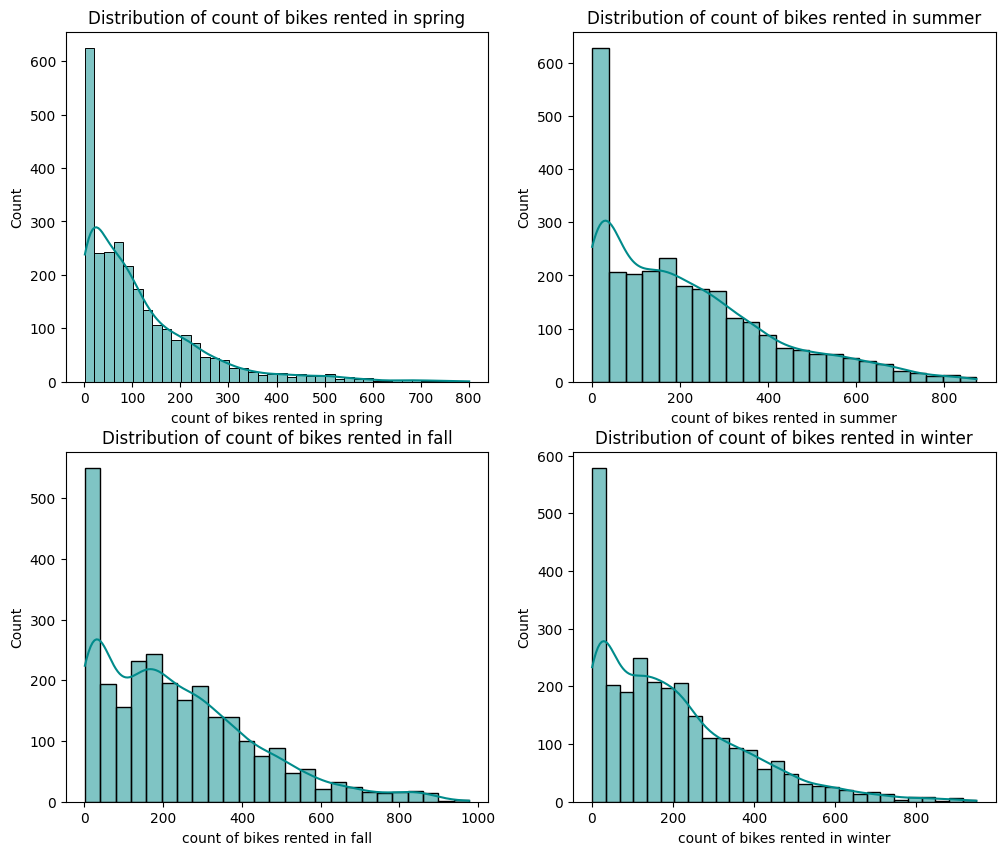

In [132]:
## Plotting the distribution of counts for all the seasons
plt.figure(figsize=(12,10))
ind = 1
seasons = ['spring','summer','fall', 'winter']
for s in [s1,s2,s3,s4]:
  plt.subplot(2,2,ind)
  sns.histplot(s, kde= True, color='darkcyan')
  plt.title("Distribution of count of bikes rented in "+ seasons[ind-1], fontsize=12)
  plt.xlabel("count of bikes rented in "+seasons[ind-1])
  ind+=1

**Distributions aren't normal**

In [133]:
## Aggregating the daily count of bikes rented
s1 = df.loc[df["season"] == 1][['date','count']].reset_index()
s1 = s1.groupby('date')["count"].sum()

s2 = df.loc[df["season"] == 2][['date','count']]
s2 = s2.groupby('date')["count"].sum()

s3 = df.loc[df["season"] == 3][['date','count']]
s3 = s3.groupby('date')["count"].sum()

s4 = df.loc[df["season"] == 4][['date','count']]
s4 = s4.groupby('date')["count"].sum()

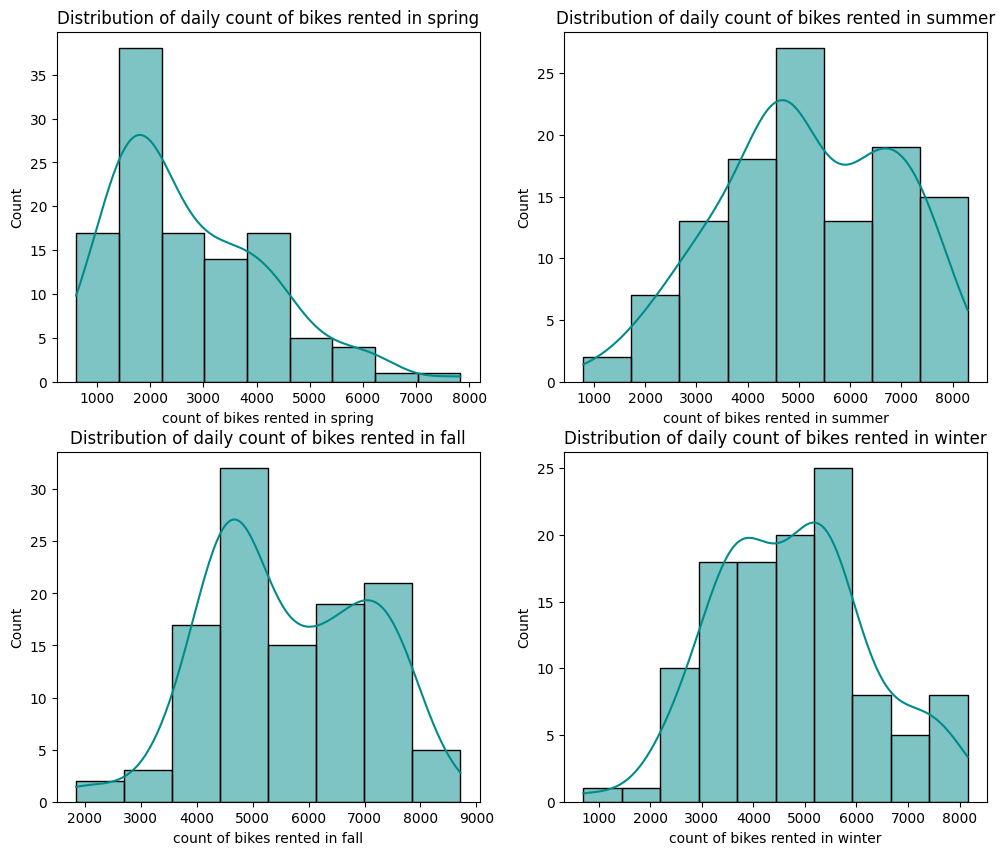

In [134]:
## Plotting the distribution of daily counts of bikes rented for all the seasons
plt.figure(figsize=(12,10))
ind = 1
seasons = ['spring','summer','fall', 'winter']
for s in [s1,s2,s3,s4]:
  plt.subplot(2,2,ind)
  sns.histplot(s, kde= True, color='darkcyan')
  plt.title("Distribution of daily count of bikes rented in "+ seasons[ind-1], fontsize=12)
  plt.xlabel("count of bikes rented in "+seasons[ind-1])
  ind+=1

In [135]:
## Shapiro's Test of Normaity
## H0: Samples have normal distribution
## Ha: Samples do not have normal distributions
## Assumption: significance level is 0.05

alpha = 0.05
i = 1
for s in [s1,s2,s3,s4]:
  pvalue = shapiro(s)[1]
  if pvalue > alpha:
    print("Count of Daily Bikes rented in season "+str(i) + " is distributed normally: pvalue is: ", pvalue)
  else:
    print("Count of Daily Bikes rented in season "+str(i) + " isn't distributed normally: pvalue is: ", pvalue)
  i+=1

Count of Daily Bikes rented in season 1 isn't distributed normally: pvalue is:  1.4321534763439558e-05
Count of Daily Bikes rented in season 2 isn't distributed normally: pvalue is:  0.032791439443826675
Count of Daily Bikes rented in season 3 isn't distributed normally: pvalue is:  0.003765953006222844
Count of Daily Bikes rented in season 4 is distributed normally: pvalue is:  0.17639805376529694


In [136]:
## Levene's test for equal variance

## H0: Samples have equal variances
## Ha: Samples do not have equal variances
## Significance level is 0.05

pvalue = levene(s1, s2, s3, s4)[1]
print('pvalue :', pvalue)
if pvalue < 0.05:
    print("Samples do not have equal variances")
else:
    print("Samples have equal variances")

pvalue : 0.21194448921499898
Samples have equal variances


In [137]:
## Anova test
# Ho : All have same means
# Ha : One or more groups have different means

p_value = f_oneway(s1,s2,s3,s4)[1]
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha :
    print("Interpretation : Reject H0 - No. of cycles rented are different in different season")
else:
    print("Interpretation : Fail to Reject H0 - No. of cycles rented aren't significently different in different season")

p_value :  1.506580502991204e-41
Interpretation : Reject H0 - No. of cycles rented are different in different season


**Performing Kruskal Test as assumptions of Anova do not met**

In [138]:
## Kruskal Test

# Ho : All have same means
# Ha : One or more groups have different means

p_value = kruskal(s1,s2,s3,s4)[1]
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha :
    print("Interpretation : Reject H0 - No. of cycles rented are different in different season")
else:
    print("Interpretation : Fail to Reject H0 - No. of cycles rented aren't significently different in different season")

p_value :  9.111105591373848e-33
Interpretation : Reject H0 - No. of cycles rented are different in different season


In [141]:
print(np.mean(s1),np.mean(s2),np.mean(s3),np.mean(s4))

2741.2105263157896 5160.368421052632 5619.8421052631575 4772.228070175439


In [142]:
## Post-hoc analysis
p1 = ttest_ind(s1,s2, alternative = "less")[1]
p2 = ttest_ind(s1,s3, alternative = "less")[1]
p3 = ttest_ind(s1,s4, alternative = "less")[1]
p4 = ttest_ind(s2,s3, alternative = "less")[1]
p5 = ttest_ind(s2,s4, alternative = "greater")[1]
p6 = ttest_ind(s3,s4, alternative = "greater")[1]
p1,p2,p3,p4,p5,p6

(5.317639344852144e-25,
 3.602660145428408e-36,
 1.834290366433615e-21,
 0.013764168439496526,
 0.03260221467964598,
 8.156224931564122e-06)

### <font color = green>Result
<font color = darkcyan>

1. Normality: Non-normal
2. Test of equal variance: True
3. Hypotheses:
    `
    - H0: Mean count of the bikes rented are same for all four season
    - Ha: Mean count of the bikes rented are not same for at least one season
    `
4. Test Results:
    `
    - With 95% Confidence, We can conclude that Mean count of the bikes rented during different seasons are not same. count is dependent on Season
    with 95% confidence, we can conclude:
  1. demand for s1 < s2
  2. demand for s1 < s3
  3. demand for s1 <  s4
  4. demand for s2 > s3
  5. demand for s2 > s4
  6. demand for s3 > s4

### Q2 (b). No. of cycles rented similar or different in different weather

In [100]:
# unique categories in weather
df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [101]:
# value count of weather
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**Excluding weather 4 from the analysis due to insufficient data**

In [102]:
## Extracting the series
w1 = df.loc[df['weather']==1]["count"]
w2 = df.loc[df['weather']==2]["count"]
w3 = df.loc[df['weather']==3]["count"]

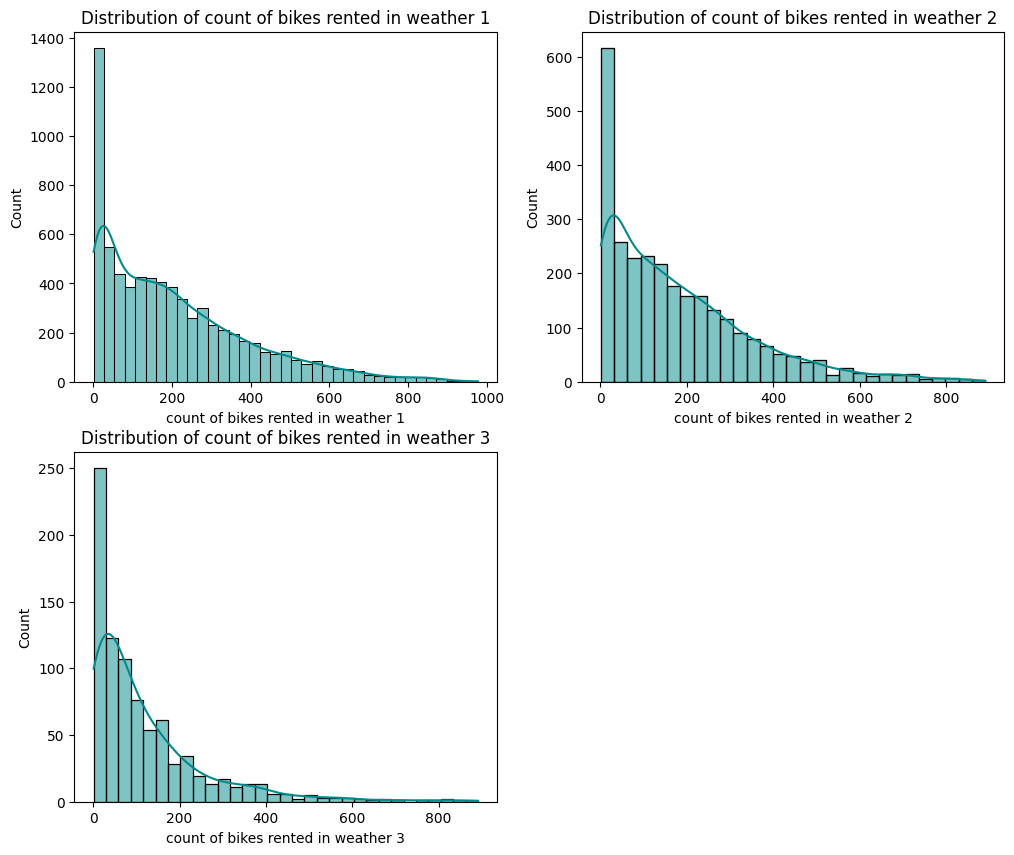

In [104]:
## Plotting the distribution of counts for all the weather
plt.figure(figsize=(12,10))
ind = 1
for w in [w1,w2,w3]:
  plt.subplot(2,2,ind)
  sns.histplot(w, kde= True, color='darkcyan')
  plt.title("Distribution of count of bikes rented in weather "+str(ind) , fontsize=12)
  plt.xlabel("count of bikes rented in weather "+str(ind))
  ind+=1

**Distributions aren't normal**

In [107]:
## Aggregating the daily count of bikes rented
w1 = df.loc[df["weather"] == 1][['date','count']].reset_index()
w1 = w1.groupby('date')["count"].sum()

w2 = df.loc[df["weather"] == 2][['date','count']].reset_index()
w2 = w2.groupby('date')["count"].sum()

w3 = df.loc[df["weather"] == 3][['date','count']].reset_index()
w3 = w3.groupby('date')["count"].sum()

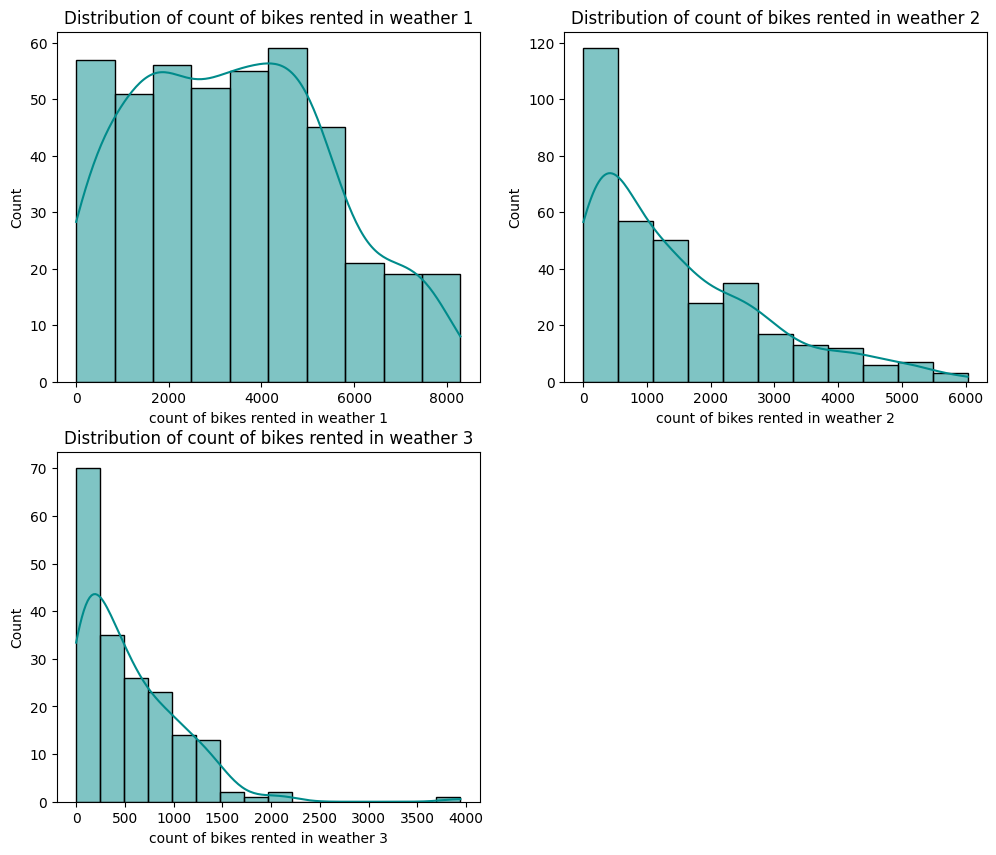

In [108]:
## Plotting the distribution of daily counts of bikes rented for all the weather
plt.figure(figsize=(12,10))
ind = 1
for w in [w1,w2,w3]:
  plt.subplot(2,2,ind)
  sns.histplot(w, kde= True, color='darkcyan')
  plt.title("Distribution of count of bikes rented in weather "+str(ind) , fontsize=12)
  plt.xlabel("count of bikes rented in weather "+str(ind))
  ind+=1

In [109]:
## Shapiro's Test of Normaity
## H0: Samples have normal distribution
## Ha: Samples do not have normal distributions
## Assumption: significance level is 0.05

alpha = 0.05
i = 1
for w in [w1,w2,w3]:
  pvalue = shapiro(w)[1]
  if pvalue > alpha:
    print("Count of Daily Bikes rented in season "+str(i) + " is distributed normally: pvalue is: ", pvalue)
  else:
    print("Count of Daily Bikes rented in season "+str(i) + " isn't distributed normally: pvalue is: ", pvalue)
  i+=1

Count of Daily Bikes rented in season 1 isn't distributed normally: pvalue is:  1.1694455537281101e-07
Count of Daily Bikes rented in season 2 isn't distributed normally: pvalue is:  6.997944805825062e-16
Count of Daily Bikes rented in season 3 isn't distributed normally: pvalue is:  3.36847439047841e-13


In [110]:
## Levene's test for equal variance

## H0: Samples have equal variances
## Ha: Samples do not have equal variances
## Significance level is 0.05

pvalue = levene(w1,w2,w3)[1]
print('pvalue :', pvalue)
if pvalue < 0.05:
    print("Samples do not have equal variances")
else:
    print("Samples have equal variances")

pvalue : 6.545722170352777e-54
Samples do not have equal variances


In [111]:
## Anova Test
# Ho : All have same means
# Ha : One or more groups have different means

p_value = f_oneway(w1,w2,w3)[1]
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha :
    print("Interpretation : Reject H0 - No. of cycles rented are different in different weather")
else:
    print("Interpretation : Fail to Reject H0 - No. of cycles rented aren't significently different in different weather")

p_value :  1.0951526874744494e-86
Interpretation : Reject H0 - No. of cycles rented are different in different season


**Performing Kruskal Test as assumptions of Anova do not met**

In [112]:
## Kruskal Test

# Ho : All have same means
# Ha : One or more groups have different means

p_value = kruskal(w1,w2,w3)[1]
print("p_value : ",p_value)
alpha = 0.05
if p_value < alpha :
    print("Interpretation : Reject H0 - No. of cycles rented are different in different weather")
else:
    print("Interpretation : Fail to Reject H0 - No. of cycles rented aren't significently different in different weather")

p_value :  4.9546120589849e-75
Interpretation : Reject H0 - No. of cycles rented are different in different weather


In [127]:
## Post-hoc analysis
p1 = ttest_ind(w1,w2, alternative = "greater")[1]
p2 = ttest_ind(w1,w3, alternative = "greater")[1]
p3 = ttest_ind(w2,w3, alternative = "greater")[1]
p1,p2,p3

(2.8405320652457963e-44, 1.0255724596146827e-60, 7.273617431482295e-18)

**Above results confirms that demand is highest during weather 1. Weather 2 has higher demand than weather 3**

### <font color = green>Result
<font color = darkcyan>

1. Normality: Non-normal
2. Test of equal variance: unequal variance
3. Hypotheses:
    `
    - H0: Mean count of the bikes rented are same for all four season
    - Ha: Mean count of the bikes rented are not same for at least one season
    `
4. Test Results:
    `
    - With 95% Confidence, We can conclude that Mean count of the bikes rented during different weathers are not same. count is dependent on weather
5. Weather 1 - Clear weather has highest demand

### Q3. Weather is dependent on season

In [120]:
# Dropping one row where weather is 4 as we don't have significant data for weather 4
df4= df.drop(df.loc[df["weather"]==4].index)

In [119]:
## Creating a contengency table
contengency_table = pd.crosstab(df4["season"], df4["weather"])
contengency_table

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [122]:
## Performing Chi square test of independence

## H0: Season and weather are independent
## Ha: Season and weather are dependent
## Significance level = 0.05

alpha = 0.05
pvalue = chi2_contingency(contengency_table)[1]
if p_value < alpha :
    print("Interpretation : Reject H0 - season and weather are dependent: pvalue is: ", pvalue)
else:
    print("Interpretation : Fail to Reject H0: season and weather are independent: pvalue is: ", pvalue)

Interpretation : Reject H0 - season and weather are dependent: pvalue is:  2.8260014509929343e-08


### <font color = green>Result
<font color = darkcyan>

1. Hypotheses:
  - H0: Season and weather are independent
  - Ha: Season and weather are dependent
2. Significance level = 0.05    `
4. Test Results: `
    - With 95% Confidence, We can conclude that weather is dependent on season

# Business Insights

- Season is a good predictor for demand.
- Workingday alone is not a good predictor.
- Weather is a good predictor for demand.
- Season and weather are dependent.
- In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
- With a significance level of 0.05, **workingday** has no effect on the number of bikes being rented.
- Bad weather, very low or very high humidity decreases demand
- Very low temperature number of bikes rented is less.

# Recommendations

- Season is a good predictor for demand. In **summer** and **fall** seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- Workingday alone is not a good predictor.
- Weather is a good predictor for demand. Higher demand in Clear weather observed and validated
- Season and weather are dependent.
- There is low correlation among windspeed, humidity, temp. Thus alone they are not good predictor
- Company should plan there anuual repair and maintenance, Preventive Maintenance, and other fix during low humid days as the demand is lower during low humid days.
- As demand is lower during Low temprature days, company should plan the other non operational ativities. Also, stocks should be moved to higher demand zone to increase the possibilities of sales
- Similary, during higher windspeed and thunderstorms, company should plan there non-operational activities

<font color = red size = 12 >
**********************End*****************